# Lecture 4 --- April 2023

## Outline of topics for this segment:

1. Programming the chutes and ladders game
2. Experimenting with it


In [1]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## The Chutes and Ladders Game ...

Prof. Buckmaster introduced the chutes and ladders game as an example of computing using Excel. The typical game board, containing 100 squares, is shown below.

<img align="left" src='Figs/Chutes&LaddersImage.png' width="500"/>

### Short version of the rules:

1. Assume there are N players, who have been ordered according to the order in which they will play by some random means (e.g., by rolling the dice, drawing straws, etc.)

2. Players all start at position 0.

3. At time k (k = 0, 1, 2, ...) the positions of the N players are indicated by p_n(k) for n = 1, 2, 3, ..., N.

4. Starting with player 1, each player throws a die and adds the value shown on the die to his position, i.e., p_1(k+1) = p_1(k) + {the roll of the die}. Then the player moves to that position on the board. If there is no chute or ladder at the new position, he remains there and his turn ends. On the other hand, if there is a chute or a ladder at the new position, the player must climb the ladder or fall down the chute as the case may be .... this change then yields the new position.

5. The first player to reach position 100 exactly wins the game. If a player rolls the die and computes a new position that would take her past 100, then the roll is voided and she remains at her original position.

### Following is a function which rolls the die and computes the new position of a player.

In [2]:
# This dictionary stores the chutes and ladders board.
CandLTable = {1:38, 4:14, 9:31, 16:6, 21:42, 28:84, 36:44, 47:26, 49:11, 51:67,
             56:53, 63:19, 64:60, 71:91, 80:100, 87:24, 93:73, 95:75, 98:78}

# The function to make a move
def CandL_make_a_move(position,CandLTable):
    roll = np.random.randint(1,7)
    if position + roll > 100:
        return position
    position += roll
    position = CandLTable.get(position, position)
    return position

### How does the `CandLTable` work?

It is a dictionary, which means a collection of key-value pairs.

# Recall our previous discussion on Python data types ...

## Collection Data Types
There are four **collection** data types: **lists**, **tuples**, **sets**, and **dictionaries**. (Some say that a **string** is a collection data type since it is a ordered set of characters --- more later).

### A. <u>Lists</u> are ordered, changeable, and allow duplicate members:

In [3]:
# Create a list with 5 elements.

Coloradothings = ["wheat", "corn", "sugar beets", "pinto beans", 1959]

print('The type of Coloradothings is:')
print(type(Coloradothings))
print()
print('The length of Coloradothings is:')
print(len(Coloradothings)) #Notice our use of the built-in python function 'len()'
print()
print('The value of Coloradothings is:')
print(Coloradothings)

The type of Coloradothings is:
<class 'list'>

The length of Coloradothings is:
5

The value of Coloradothings is:
['wheat', 'corn', 'sugar beets', 'pinto beans', 1959]


### B. <u>Tuples</u> are ordered, unchangeable, and allow duplicate members.

In [4]:
# Make a tuple.

Indianathings = ("Basketball", "Corn")

print(type(Indianathings))
print()
print(Indianathings)

#Indianathings.append("Wall street") # uncomment this to see an error


<class 'tuple'>

('Basketball', 'Corn')


In [5]:
Indianathings.append("Wall street")

AttributeError: 'tuple' object has no attribute 'append'

Tuples can contain a single item but to do this we must specify them with a comma after the first and only element, e.g., `Indianathings = ("Basketball")` is not a tuple (it's a string), while `Indianathings = ("Basketball",)` is a tuple.

Tuples **cannot** be changed. For example, if Indianathings is a tuple then `Indianathings.append("Wall street")` will cause an error.

### C. <u>Sets</u> are unordered, changeable (in the sense that we can add and remove items from sets). Sets do not allow duplicates.

In [6]:
# Make a set.

Purduethings = {"Ag and Bio Engineering", "Ross-Ade Stadium", "students", "professors", "Gene Keady", "study sessions"}

print(type(Purduethings))
print(Purduethings) # Note the order it prints
print()

print("Ag and Bio Engineering" in Purduethings)
print("Medical School" in Purduethings)

<class 'set'>
{'Ross-Ade Stadium', 'students', 'Ag and Bio Engineering', 'professors', 'study sessions', 'Gene Keady'}

True
False


### D. <u>Dictionaries</u> are unordered, changeable, and indexed. Written with "{}" but made up of key-value pairs. 

A **key-value pair** is a pair of strings separated by a colon. Different key-value pairs are separated by commas. It looks like `{"key1": "value1", "key2: "value2"}`.

In [7]:
# Make some dictionaries of farm equipment.
OldCombine = {"brand": "CASE", "model": "7130", "year": 2014}
NewCombine = {"brand": "CASE", "model": "8240", "year": 2016}
Tractor1 = {"brand": "CASE", "model": "290", "year": 2013}
Pickup = {"brand": "CHEVY", "model": "Silverado", "year": 2005}
FavoriteOldCombineEver = {"brand": "JD", "model": "7720", "year": 1978, "color": "green"}

print(type(FavoriteOldCombineEver))
print(FavoriteOldCombineEver)

<class 'dict'>
{'brand': 'JD', 'model': '7720', 'year': 1978, 'color': 'green'}


**Note:** Dictionaries can contain dictionaries.

In [8]:
# Create a dictionary of farm equipment from the dictionaries of
# individual machines.

FarmEquipment = {"C1": OldCombine, "C2": NewCombine, "T1": Tractor1, "P1": Pickup, "C3": FavoriteOldCombineEver}
print(FarmEquipment)

{'C1': {'brand': 'CASE', 'model': '7130', 'year': 2014}, 'C2': {'brand': 'CASE', 'model': '8240', 'year': 2016}, 'T1': {'brand': 'CASE', 'model': '290', 'year': 2013}, 'P1': {'brand': 'CHEVY', 'model': 'Silverado', 'year': 2005}, 'C3': {'brand': 'JD', 'model': '7720', 'year': 1978, 'color': 'green'}}


### Back to .... How does the `CandLTable` work?

It is a dictionary, which means a collection of key-value pairs. Here is a link to `methods` that work with dictionaries ... <a href="https://www.w3schools.com/python/python_ref_dictionary.asp" target="_blank">Dictionary Methods</a>.

Let's try a few ...

In [9]:
print(CandLTable.keys())

dict_keys([1, 4, 9, 16, 21, 28, 36, 47, 49, 51, 56, 63, 64, 71, 80, 87, 93, 95, 98])


In [10]:
print(CandLTable.values())

dict_values([38, 14, 31, 6, 42, 84, 44, 26, 11, 67, 53, 19, 60, 91, 100, 24, 73, 75, 78])


In [11]:
print(CandLTable.items())

dict_items([(1, 38), (4, 14), (9, 31), (16, 6), (21, 42), (28, 84), (36, 44), (47, 26), (49, 11), (51, 67), (56, 53), (63, 19), (64, 60), (71, 91), (80, 100), (87, 24), (93, 73), (95, 75), (98, 78)])


In [12]:
# Simplest usage, good for when we know that the referenced key exists ...
CandLTable.get(49)

11

In [13]:
# What happens if the key does not exist in the dictionary?
CandLTable.get(48)

### Nothing happens apparently

In [14]:
# Sometimes you can use print() to force the interpreter to show a value ...
print(CandLTable.get(48))

None


### This is why we need the second argument in the call to the dictionary. It specifies what to return in the case that the key is missing ...

In [15]:
# Specifying a second argument in the call
print(CandLTable.get(48,-1))

-1


### How does `random` work?

Random number generators are covered in many places ... <a href="https://numpy.org/doc/stable/reference/random/index.html?highlight=random%20sampling%20numpy%20random#module-numpy.random" target="_blank">Random Numbers in NumPy</a>.

In [18]:
print(np.random.randint(1,7))

2


In [19]:
np.random.seed(12345)
print(np.random.randint(1,6))
print(np.random.randint(1,6))
print(np.random.randint(1,6))
print(np.random.randint(1,6))
print(np.random.randint(1,6))
print(np.random.randint(1,6))

3
2
5
2
3
2


In [20]:
np.random.seed(1)

for i in range(100):
    print(np.random.randint(1,7))

6
4
5
1
2
4
6
1
1
2
5
6
5
2
3
5
6
3
5
4
5
3
5
6
3
5
2
2
1
6
2
2
6
2
2
1
5
2
1
1
6
4
3
2
1
4
6
2
2
4
5
1
2
4
5
3
5
1
6
4
2
3
1
5
2
3
3
2
1
2
4
6
5
4
6
2
4
1
1
3
3
2
4
5
3
1
1
2
2
6
4
1
1
6
6
5
6
3
5
4


In [29]:
rolls = np.random.randint(1,7,10)

(array([1., 0., 2., 0., 1., 0., 3., 0., 1., 0., 2.]),
 array([1.        , 1.45454545, 1.90909091, 2.36363636, 2.81818182,
        3.27272727, 3.72727273, 4.18181818, 4.63636364, 5.09090909,
        5.54545455, 6.        ]),
 <BarContainer object of 11 artists>)

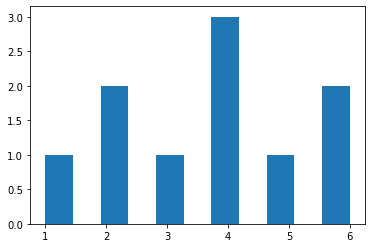

In [30]:
plt.hist(rolls, bins=11)

# Program Chutes and Ladders Game

Write a program which plays a game between two people until one wins and produces a record of the game play.

Convert your the single game code into a function and then write a program to play a large number of games one after another keeping a record of who won and how long the game lasted. Then compute statistics and/or histograms.

Finally, explore how changes to the positions of chutes and ladders might change the game.

### Basic Game

Player 2 Wins!!


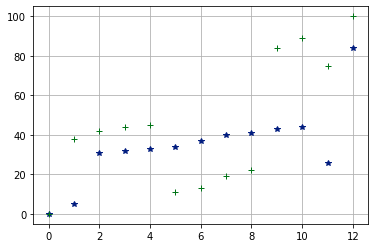

In [31]:
P1 = np.array([0])
P2 = np.array([0])

p1 = 0
p2 = 0

while (p1 < 100 and p2 < 100):
    p1 = CandL_make_a_move(p1, CandLTable)
    p2 = CandL_make_a_move(p2, CandLTable)
    P1 = np.append(P1, p1)
    P2 = np.append(P2, p2)
    if p1 == 100:
        print('Player 1 Wins!!')
    elif p2 == 100:
        print('Player 2 Wins!!')

# This simply plots the positions of the two players over the
# course of the game.
fig3 = plt.figure()
plt.style.use('seaborn-dark-palette')
plt.plot(P1,'*')
plt.plot(P2,'+')
plt.grid()

### Playing many games

Average number of rounds per game is 26.40
Player 1 won 526 of 1000 games
Player 2 won 474 of 1000 games


(array([ 31.,  78., 112.,  77.,  97.,  91., 103.,  55.,  77.,  60.,  48.,
         26.,  34.,  21.,  16.,  12.,  17.,   7.,   4.,   7.,  12.,   3.,
          1.,   3.,   4.,   1.,   0.,   1.,   1.,   1.]),
 array([ 7.        ,  9.73333333, 12.46666667, 15.2       , 17.93333333,
        20.66666667, 23.4       , 26.13333333, 28.86666667, 31.6       ,
        34.33333333, 37.06666667, 39.8       , 42.53333333, 45.26666667,
        48.        , 50.73333333, 53.46666667, 56.2       , 58.93333333,
        61.66666667, 64.4       , 67.13333333, 69.86666667, 72.6       ,
        75.33333333, 78.06666667, 80.8       , 83.53333333, 86.26666667,
        89.        ]),
 <BarContainer object of 30 artists>)

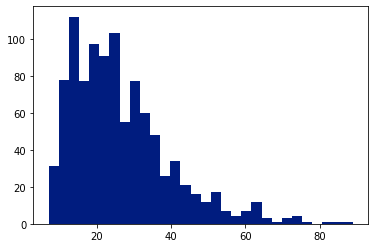

In [32]:
# Convert game code to function

def CandL_play_a_game(CandLTable):
    p1 = 0
    p2 = 0
    Nmoves = 0
    p1wins = 0
    p2wins = 0
    while (p1 < 100 and p2 < 100):
        p1 = CandL_make_a_move(p1, CandLTable)
        p2 = CandL_make_a_move(p2, CandLTable)
        Nmoves += 1
        if p1 == 100:
            p1wins += 1
        elif p2 == 100:
            p2wins += 1
    return Nmoves, p1wins, p2wins
     
Ngames = 1000
Np1wins = 0
Np2wins = 0

GameLengths = np.array([])

for k in range(Ngames):
    L = CandL_play_a_game(CandLTable)
    Np1wins += L[1]
    Np2wins += L[2]
    GameLengths = np.append(GameLengths, L[0])

print('Average number of rounds per game is {:.2f}'.format(np.mean(GameLengths)))
print('Player 1 won {} of {} games'.format(Np1wins,Ngames))
print('Player 2 won {} of {} games'.format(Np2wins,Ngames))

plt.hist(GameLengths, bins=30)

### Modify the table to see it's effect on the game ...

Average number of rounds per game is 86.93
Player 1 won 485 of 1000 games
Player 2 won 515 of 1000 games


(array([136., 180., 141., 115.,  90.,  51.,  63.,  56.,  30.,  24.,  26.,
         15.,  13.,  22.,   9.,   6.,   4.,   1.,   2.,   1.,   3.,   4.,
          5.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 15.        ,  30.26666667,  45.53333333,  60.8       ,
         76.06666667,  91.33333333, 106.6       , 121.86666667,
        137.13333333, 152.4       , 167.66666667, 182.93333333,
        198.2       , 213.46666667, 228.73333333, 244.        ,
        259.26666667, 274.53333333, 289.8       , 305.06666667,
        320.33333333, 335.6       , 350.86666667, 366.13333333,
        381.4       , 396.66666667, 411.93333333, 427.2       ,
        442.46666667, 457.73333333, 473.        ]),
 <BarContainer object of 30 artists>)

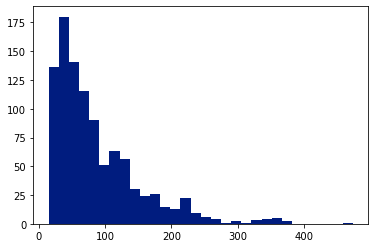

In [33]:
# This dictionary stores the chutes and ladders board.
CandLTable2 = {4:14, 9:31, 16:6, 21:42, 36:44, 47:26, 49:11, 51:67,
             56:53, 63:19, 64:60, 80:2, 87:24, 93:73, 95:75, 98:78}

Ngames = 1000
Np1wins = 0
Np2wins = 0

GameLengths = np.array([])

for k in range(Ngames):
    L = CandL_play_a_game(CandLTable2)
    Np1wins += L[1]
    Np2wins += L[2]
    GameLengths = np.append(GameLengths, L[0])
    
print('Average number of rounds per game is {:.2f}'.format(np.mean(GameLengths)))
print('Player 1 won {} of {} games'.format(Np1wins,Ngames))
print('Player 2 won {} of {} games'.format(Np2wins,Ngames))

plt.hist(GameLengths, bins=30)